# Investigating nature of poles of spectral integrand

In order to figure out how to find residues theoretically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plot_complex, plot_complex_surface, plot_complex_contour
from scipy.optimize import newton
%matplotlib widget
plt.style.use('dark_background')

## Set up slab and input function

In [2]:
A = SlabExact(symmetric=True)

In [3]:
b = .5
def quadratic_piecewise(x):
    conds = [(x<-b), ((-b<=x)*(x<=b)), (x>b)]
    funcs = [0, lambda x: 1 - (x/b)**2, 0]
    return np.piecewise(x, conds, funcs)

f0 = quadratic_piecewise

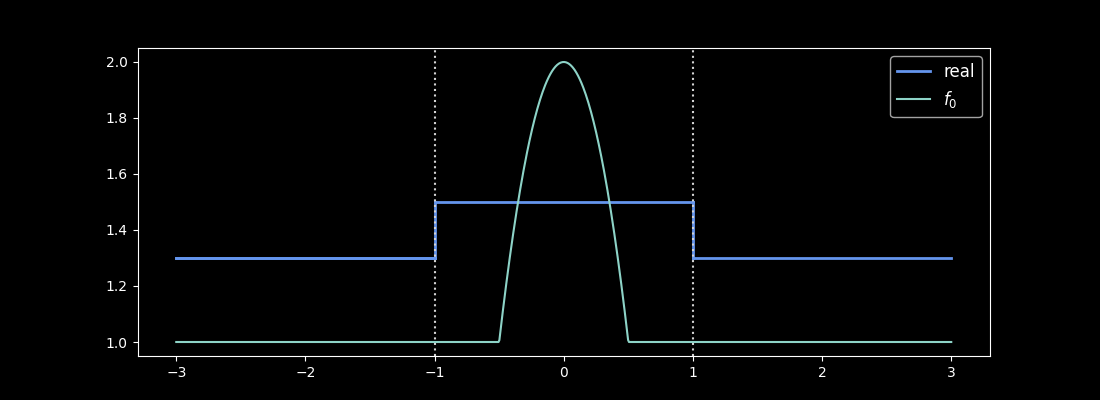

In [4]:
A.plot_refractive_index(color='cornflowerblue', linewidth=2);
A.add_1d_plot(lambda x: f0(x) + 1, label='$f_0$')

## Examine spectral integrand and find exact poles for paper method

In this simple guide these should overlap with leaky mode locations

In [5]:
Lx, Rx = -b, b
ft = 'TE'
paper_method = True
sign = None

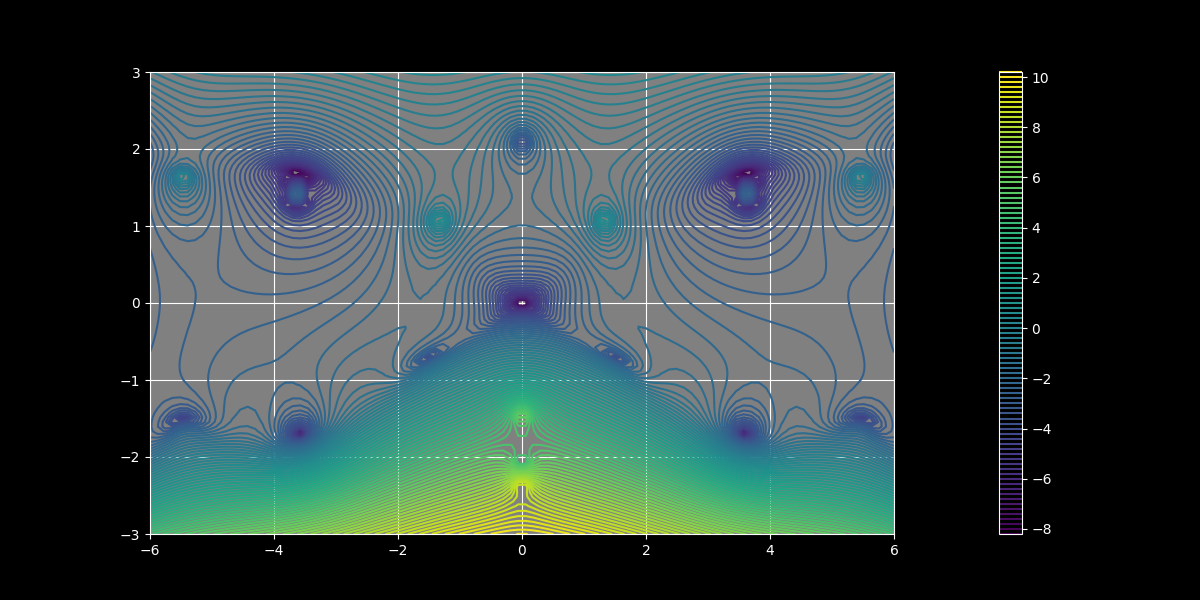

In [6]:
fargs = (f0, 0, 0, Lx, Rx, False, False, ft, paper_method)
plot_complex(A.spectral_integrand, -6, 6, -3, 3, fargs=fargs, rref=100, iref=100, levels=100)

## Observe radiation poles using other method

We now have a built in way to find the poles using only the radiation mode coefficients.

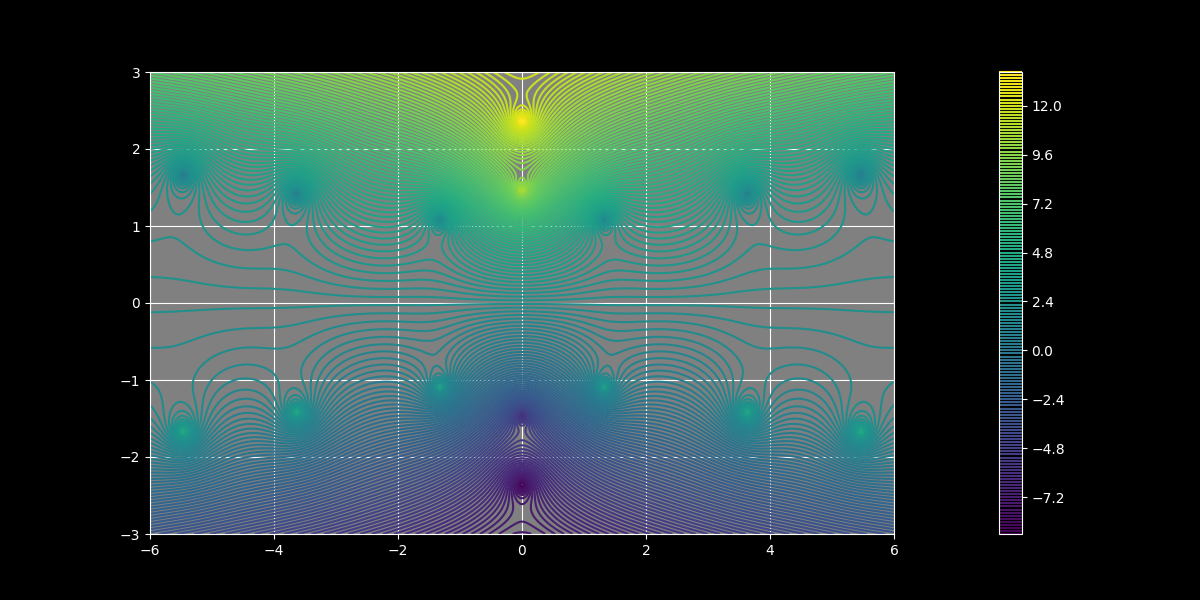

In [7]:
fargs = (ft, sign, paper_method)

plot_complex(A.radiation_poles_as_zeros, -6, 6, -3, 3, fargs=fargs, rref=250, iref=250, levels=150)

The poles appear as zeros.  The relevant pole locations are in quadrant II.  These should overlap with leaky mode locations for this simple symmetric guide:

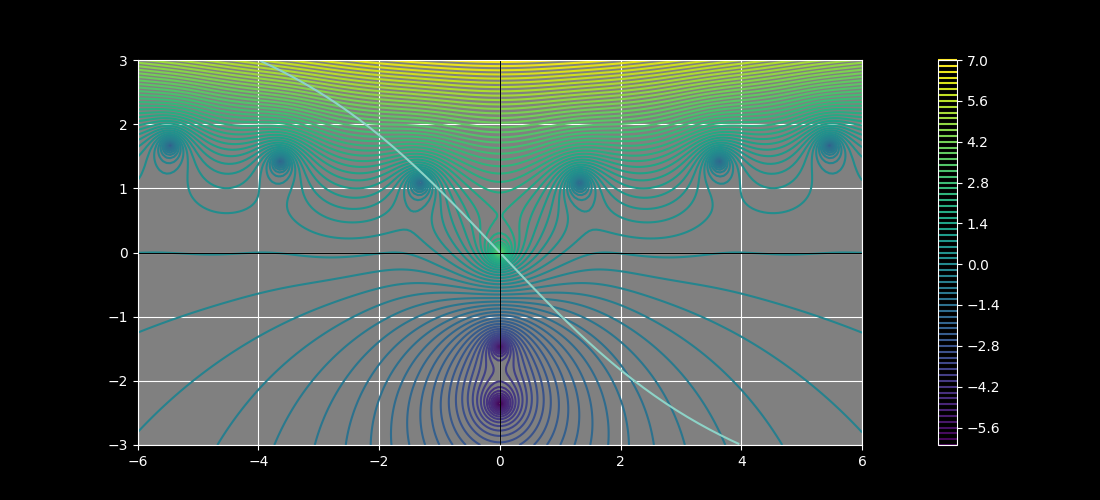

In [8]:
mt = 'leaky'
A.determinant_plot(-6, 6, -3, 3, mode_type=mt);

Find the zeros

In [9]:
guesses = [
    -1.2 + 1.15j,
    -3.8 + 1.4j,
    -5.7 + 1.7j,
]
Zs = np.array([newton(A.determinant_Z, np.array(guess), args=('TE', 'leaky')) for guess in guesses])

Plot them over the radiation poles as zeros plot and see if the correspond

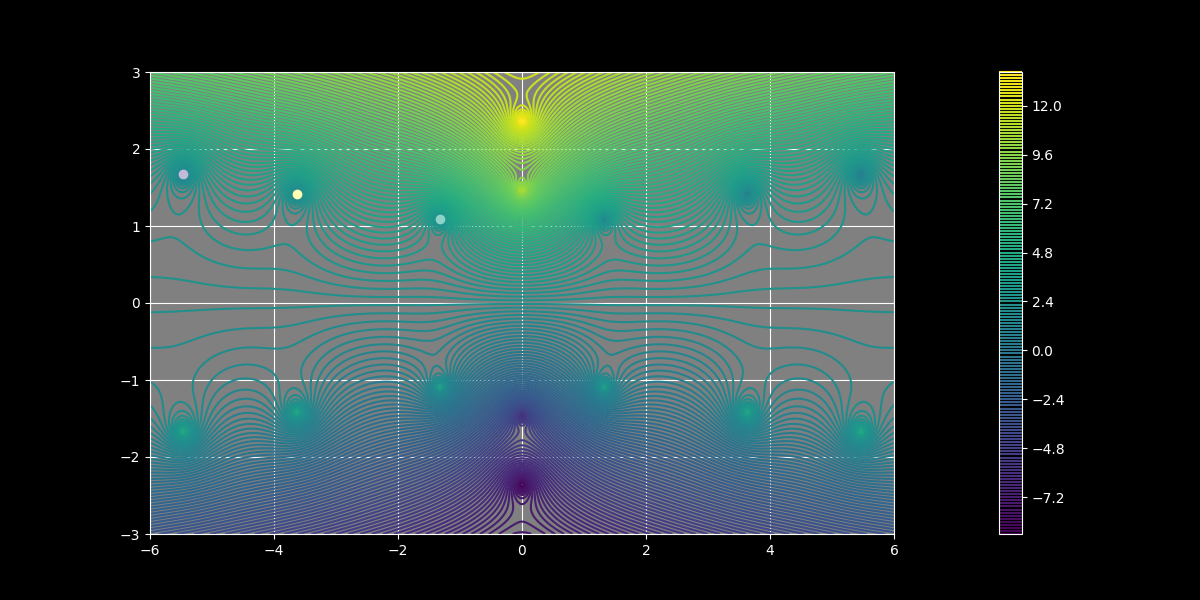

In [10]:
fargs = (ft, sign, paper_method)

plot_complex(A.radiation_poles_as_zeros, -6, 6, -3, 3, fargs=fargs, rref=250, iref=250, levels=150)
A.plot_points(Zs, ms=6)

As expected, leaky mode locations are poles of the spectral integrand.  Now let's check out their residues.  If they are simple poles, then 

$$\lim_{Z\rightarrow C} (Z - C) F(x, z, Z),$$ 

where $F(x, z, Z)$ is the spectral integrand and $C$ is a leaky mode pole location, should exist and be finite.  So we pick a leaky mode $C$ and plot the expression inside the limit above:

In [14]:
fargs = (f0, 0, 0, Lx, Rx, False, False, ft, paper_method)

def residue(Z, C=Zs[0], k=1):
    return (Z - C)**k * A.spectral_integrand(Z, *fargs)

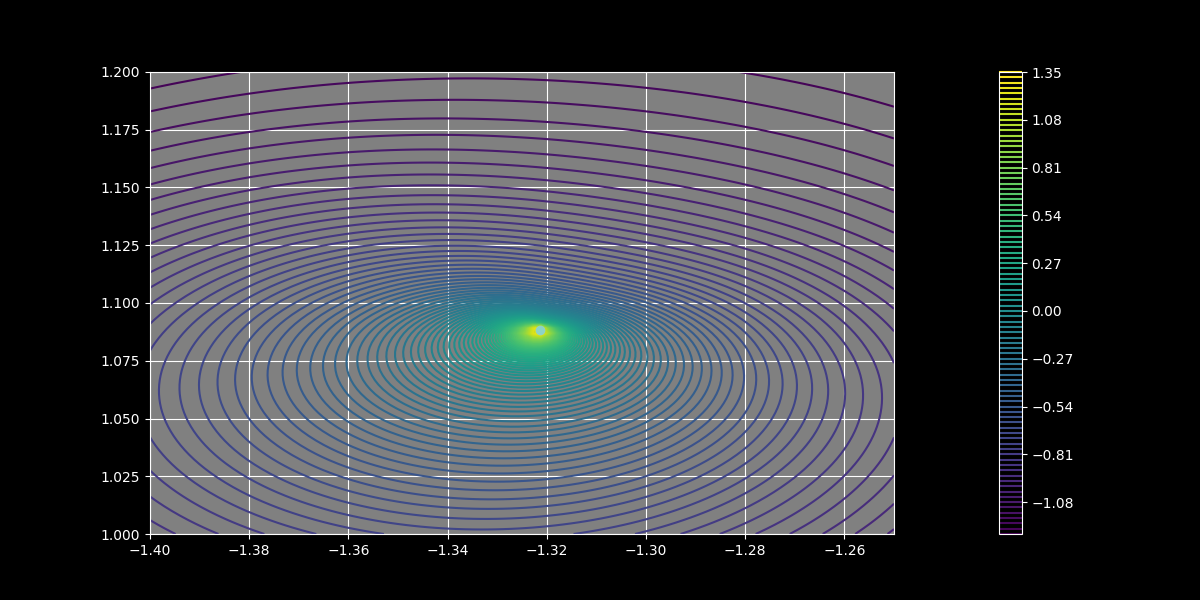

In [13]:
plot_complex(residue, -1.4, -1.25, 1, 1.2, fargs=(Zs[0], 1), rref=100, iref=100, levels=100)
A.plot_points(Zs[:1], ms=6)

Doesn't appear that limit exists there for $k=1$.  Let's look at the surface

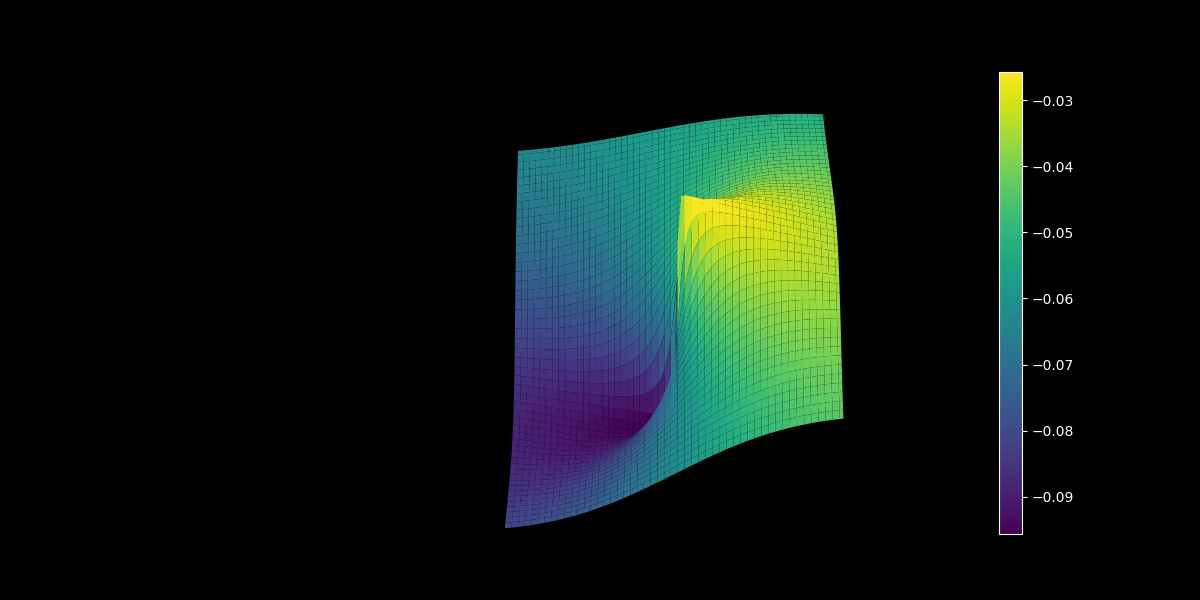

In [32]:
plot_complex_surface(residue, -1.4, -1.25, 1, 1.2, fargs=(Zs[0], 1), rref=100, iref=100, part='real')


In [15]:
# plot_complex_surface(residue, -1.4, -1.25, 1, 1.2, rref=100, iref=100, part='imag')


Can also check along contours

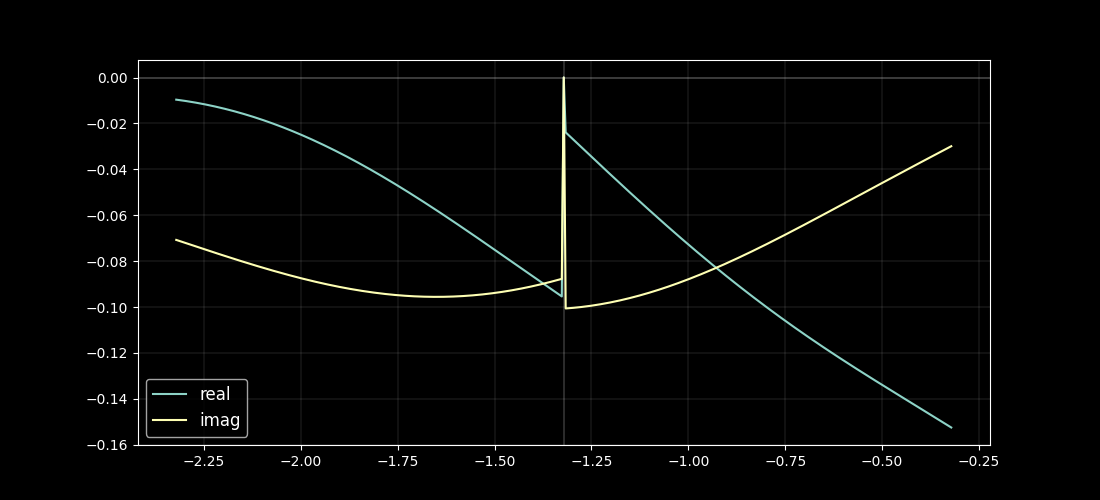

In [17]:
plot_complex_contour(residue, A.horizontal_contour(Zs[0].imag, Zs[0].real - 1, Zs[0].real + 1, 400), fargs=(Zs[0], 1))
plt.gca().axvline(Zs[0].real, lw=.25)
plt.gca().axhline(0, lw=.25)

In [18]:
# plot_complex_contour(residue, A.vertical_contour(Zs[0].real, Zs[0].imag - 1, Zs[0].imag + 1, 400), fargs=(Zs[0], 2))
# plt.gca().axvline(Zs[0].imag, lw=.25)
# plt.gca().axhline(0, lw=.25)

Yeah, limit does not exist there when $k=1$, but does when $k=2$, so it looks like it's a pole of order 2.  But wait:

This is a bit of a weird situation. According to Marsden, Complex analysis (3rd ed) on pg 228 proposition 3.3.4 part 3, the pole will be of order $k$ if either $\lim_{z\rightarrow z_0} (z-z_0)^{k+1} f(z) = 0$ or if $\lim_{z\rightarrow z_0} (z-z_0)^{k} f(z)$ exists.  The former holds for $k=1$, but not the latter. So perhaps it's still order 1.

Part 2 of the same proposition says $z_0$ is a simple pole if and only if  $\lim_{z\rightarrow z_0} (z-z_0)^{k} f(z)$ exists and is non-zero.  Our situation is that this limit doesn't exist.  So... it can't be a simple pole.  I'm still a bit stumped on this one.

## Repeat above using our normalization

It looks like we get simple poles in this case

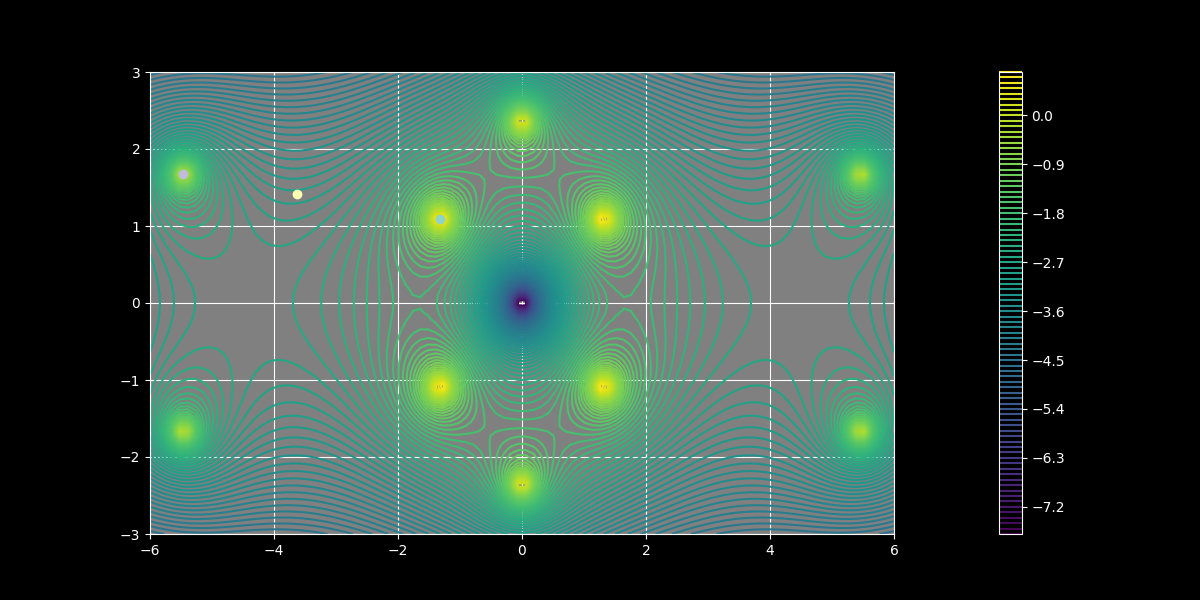

In [15]:
paper_method = False
fargs = (f0, 0, 0, Lx, Rx, True, False, ft, paper_method)

plot_complex(A.spectral_integrand, -6, 6, -3, 3, fargs=fargs, rref=100, iref=100, levels=100,)
A.plot_points(Zs, ms=6)

Note that we expect some of the poles not to appear where we might expect from leaky mode locations since we have an even input function and this normalization has all modes even and odd, so the radiation transform of $f$ at odd leaky mode locations should be zero.  Note that this doesn't mean spectral integrand is zero there though, just that the odd portion of the spectral integrand there is zero (also note that in this case the odd portion is identically zero everywhere).

### Observe that limit is well defined for our method of normalization

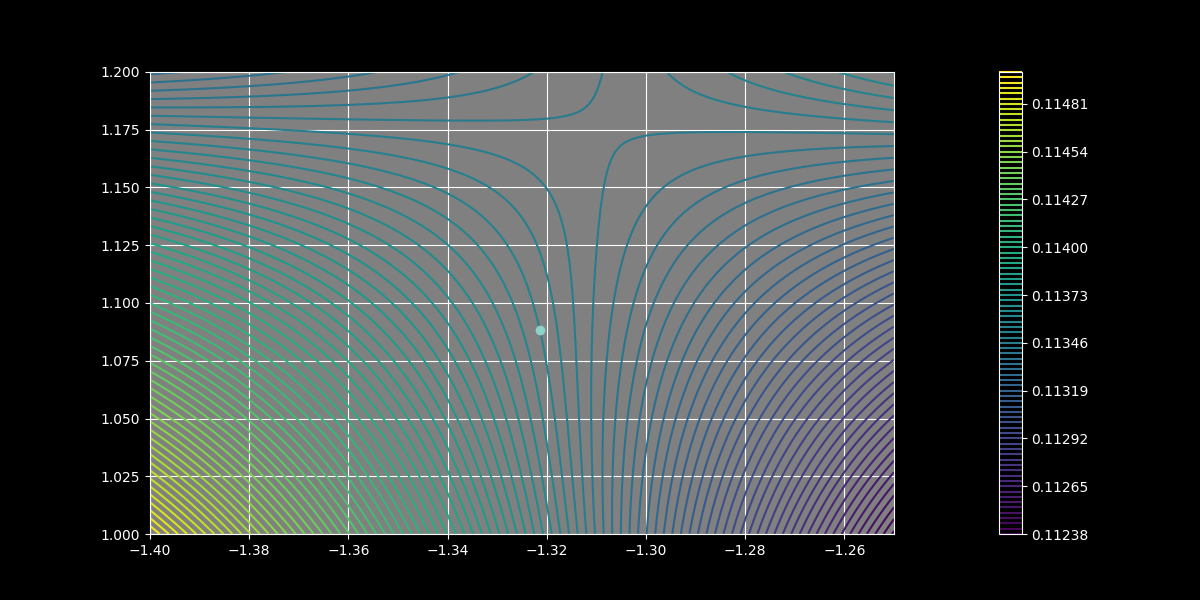

In [24]:
fargs = (f0, 0, 0, Lx, Rx, True, False, ft, paper_method)
plot_complex(residue, -1.4, -1.25, 1, 1.2, fargs=(Zs[0], 1), rref=100, iref=100, levels=100)
A.plot_points(Zs[:1], ms=6)

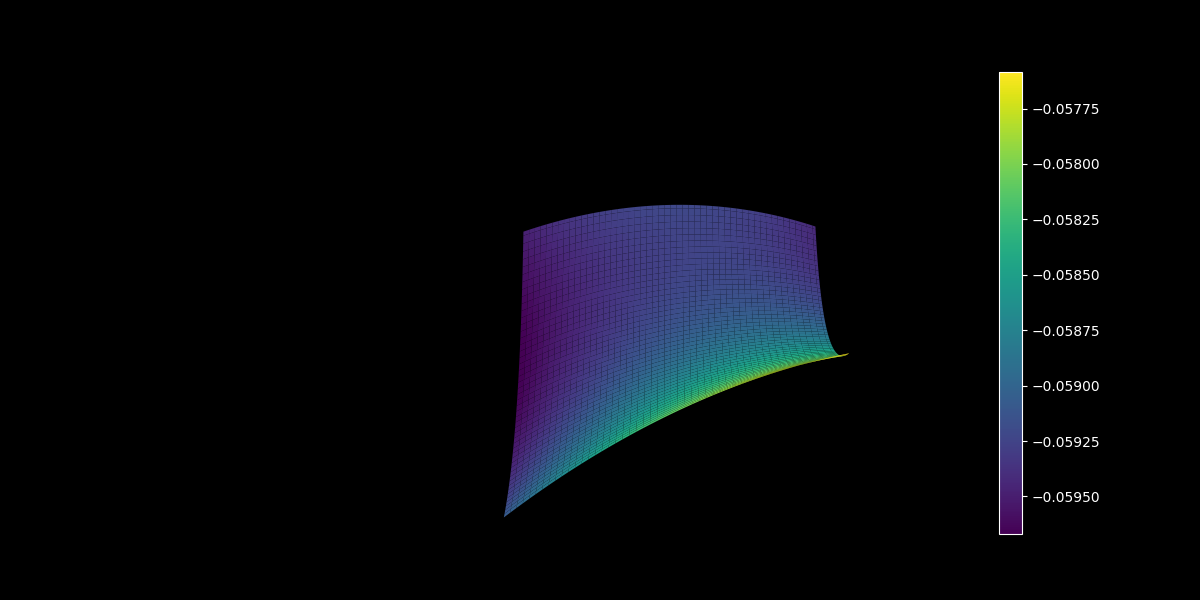

In [23]:
plot_complex_surface(residue, -1.4, -1.25, 1, 1.2, fargs=(Zs[0], 1), rref=100, iref=100, part='real')


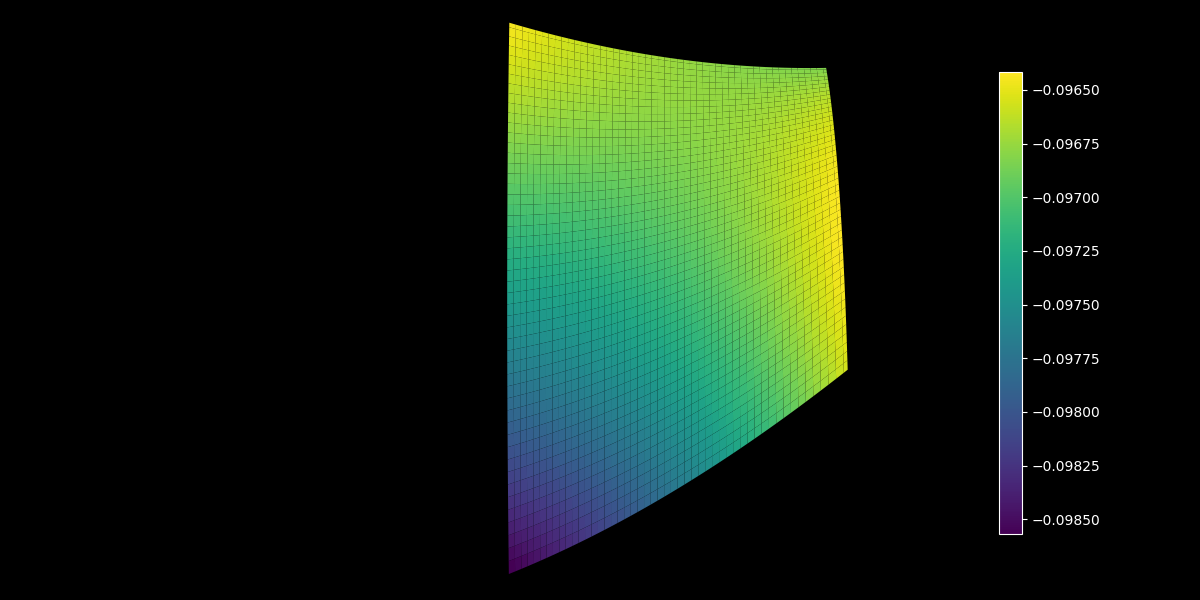

In [18]:
plot_complex_surface(residue, -1.4, -1.25, 1, 1.2, rref=100, iref=100, part='imag')


## Check simple example for the confusing case

Let's look at $f(z) = 1/(1 - z)^2$.  it has, well that won't work: limit isn't zero for k=2.  

In [112]:
def F(z):
    out = np.zeros_like(z)
    msk = np.where(np.abs(z) <= .1)
    out[:] = 1/z**3
    out[msk] = 1
    return out

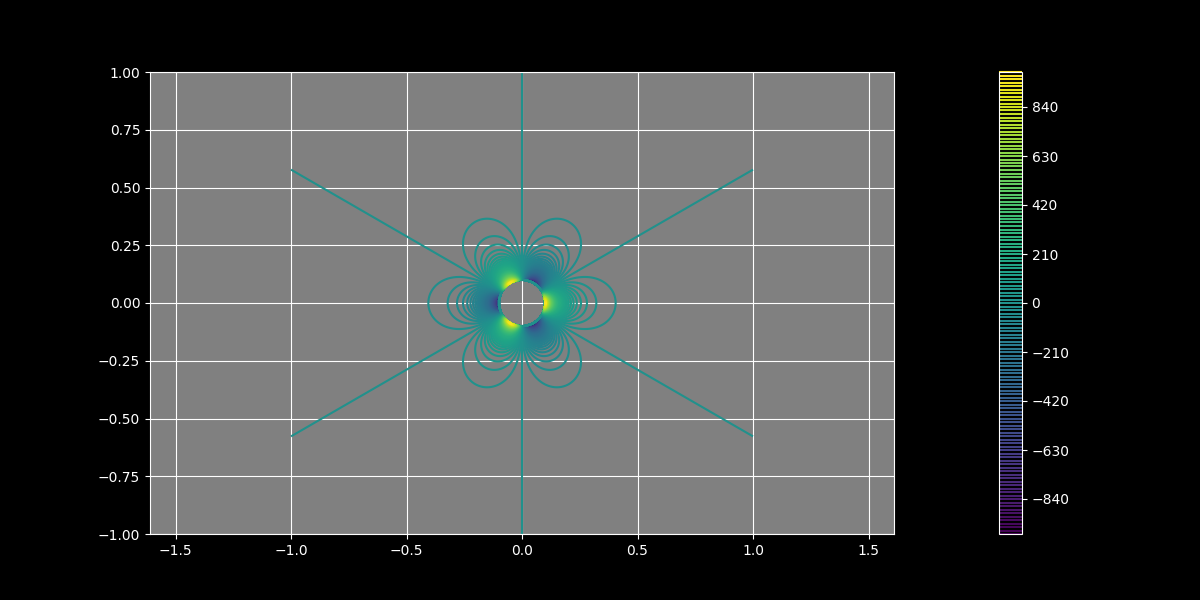

In [113]:
plot_complex(F, -1, 1, -1, 1, part='real', rref=1000, iref=1000, levels=150, log_abs=False, equal=True)